In [1]:
import pandas as pd
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import Data
data = pd.read_csv('fer2013_new.csv')

In [10]:
type(data)

pandas.core.frame.DataFrame

In [7]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(48, 48),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

In [19]:
def rotateImage(data, angle):
    myList = []
    x = data.values.astype(np.float32)
    for row in x:
        #rotation angle in degree
        rotated = np.around(ndimage.rotate(row.reshape(48, 48), angle = angle, reshape = False, mode = 'nearest'))
        myList.append(np.reshape(rotated, num_features))
    return myList

In [ ]:
# Drop last column
data = data[data.columns[:-1]]

In [ ]:
df = data['pixels'].str.split(' ',expand=True)

In [ ]:
# Drop last column (string of pixels)
data = data[data.columns[:-1]]

In [ ]:
# concat labels with delimited pixels
result = pd.concat([data, df], axis=1, join='inner')

In [ ]:
result = result[result.columns[0:]]


## Rotate Image

In [53]:
num_features = 2304

xDF = data[data.columns[1:num_features+1]]    #DF
yDF = data[data.columns[0]]

xDF.shape

result = rotateImage(xDF, 10)

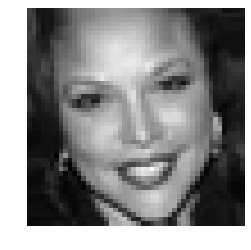

In [54]:
vectortoimg(result[-11])

In [55]:
result2 = np.array(result)
result3 = pd.DataFrame(result2)
result4 = pd.concat([yDF, result3], axis=1)

In [56]:
result4.to_csv('fer2013_10toleft.csv', sep=',', index = False )

In [57]:
#Import Data
data = pd.read_csv('fer2013_new.csv')
data2 = pd.read_csv('fer2013_10toleft.csv')

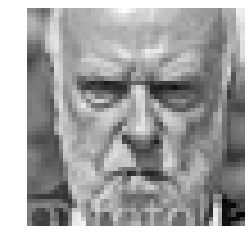

In [69]:
vectortoimg(data[data.columns[1:num_features+1]].values.astype(np.int32)[151])

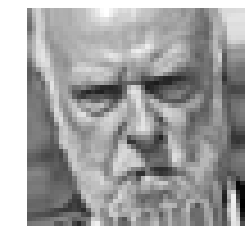

In [70]:
vectortoimg(data2[data2.columns[1:num_features+1]].values.astype(np.int32)[151])

,emotion,0,1,2,3,4,5,6,7,8,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,57.0,59.0,62.0,60.0,54.0,61.0,54.0,57.0,101.0,...,141.0,145.0,152.0,134.0,147.0,175.0,188.0,158.0,112.0,113.0
1,0,143.0,121.0,118.0,155.0,172.0,179.0,174.0,150.0,156.0,...,120.0,146.0,136.0,124.0,109.0,107.0,99.0,101.0,112.0,71.0
2,2,157.0,142.0,169.0,173.0,195.0,175.0,74.0,32.0,46.0,...,130.0,84.0,52.0,77.0,99.0,124.0,153.0,135.0,116.0,107.0
3,4,29.0,20.0,19.0,23.0,37.0,35.0,18.0,25.0,34.0,...,133.0,138.0,158.0,206.0,196.0,138.0,127.0,133.0,132.0,135.0
4,6,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,6.0,...,119.0,37.0,-3.0,0.0,5.0,28.0,34.0,30.0,32.0,28.0
